In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


# 表示用の設定を変更します
%matplotlib inline
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.width = 130


In [2]:
balance = pd.read_csv("./data/balance_sheet.csv")
income = pd.read_csv("./data/income.csv")


In [3]:
print(balance.columns.values)
print()
print(income.columns.values)

['accountsPayable' 'capitalSurplus' 'commonStock' 'currency'
 'currentAssets' 'currentCash' 'currentLongTermDebt' 'filingType'
 'fiscalDate' 'fiscalQuarter' 'fiscalYear' 'goodwill' 'intangibleAssets'
 'inventory' 'longTermDebt' 'longTermInvestments' 'minorityInterest'
 'netTangibleAssets' 'otherAssets' 'otherCurrentAssets'
 'otherCurrentLiabilities' 'otherLiabilities' 'propertyPlantEquipment'
 'receivables' 'reportDate' 'retainedEarnings' 'shareholderEquity'
 'shortTermInvestments' 'symbol' 'totalAssets' 'totalCurrentLiabilities'
 'totalLiabilities' 'treasuryStock' 'id' 'key' 'subkey' 'date' 'updated']

['costOfRevenue' 'currency' 'ebit' 'filingType' 'fiscalDate'
 'fiscalQuarter' 'fiscalYear' 'grossProfit' 'incomeTax' 'interestIncome'
 'minorityInterest' 'netIncome' 'netIncomeBasic' 'operatingExpense'
 'operatingIncome' 'otherIncomeExpenseNet' 'pretaxIncome' 'reportDate'
 'researchAndDevelopment' 'sellingGeneralAndAdmin' 'symbol' 'totalRevenue'
 'id' 'key' 'subkey' 'date' 'updated']


In [4]:
balance_income = pd.merge(balance, income, how='left', on=['key', 'fiscalYear', 'fiscalQuarter'])

balance_income.head()

,accountsPayable,capitalSurplus,commonStock,currency_x,currentAssets,currentCash,currentLongTermDebt,filingType_x,fiscalDate_x,fiscalQuarter,fiscalYear,goodwill,intangibleAssets,inventory,longTermDebt,longTermInvestments,minorityInterest_x,netTangibleAssets,otherAssets,otherCurrentAssets,otherCurrentLiabilities,otherLiabilities,propertyPlantEquipment,receivables,reportDate_x,retainedEarnings,shareholderEquity,shortTermInvestments,symbol_x,totalAssets,totalCurrentLiabilities,totalLiabilities,treasuryStock,id_x,key,subkey_x,date_x,updated_x,costOfRevenue,currency_y,ebit,filingType_y,fiscalDate_y,grossProfit,incomeTax,interestIncome,minorityInterest_y,netIncome,netIncomeBasic,operatingExpense,operatingIncome,otherIncomeExpenseNet,pretaxIncome,reportDate_y,researchAndDevelopment,sellingGeneralAndAdmin,symbol_y,totalRevenue,id_y,subkey_y,date_y,updated_y
0,63846000000,NaN,16935119000,USD,1.541060e+11,7.682600e+10,1.276200e+10,10-Q,2020-12-26,1,2021,0.0,0.0,4.973000e+09,9.928100e+10,1.999480e+11,0.0,6.622400e+10,4.327000e+10,1.368700e+10,5.589900e+10,5.604200e+10,3.793300e+10,5.862000e+10,2021-01-28,1.430100e+10,6.622400e+10,1.368700e+10,AAPL,3.540540e+11,1.325070e+11,2.878300e+11,0.0,BALANCE_SHEET,AAPL,quarterly,1608940800000,1612292383000,6.711100e+10,USD,3.353400e+10,10-Q,2020-12-26,4.432800e+10,4.824000e+09,638000000.0,0.0,2.875500e+10,2.875500e+10,7.790500e+10,3.353400e+10,0,3.357900e+10,2021-01-28,5.163000e+09,5.631000e+09,AAPL,1.114390e+11,INCOME,quarterly,1608940800000,1612292383000
1,42296000000,NaN,17057620000,USD,1.437130e+11,9.094300e+10,1.376900e+10,10-K,2020-09-26,4,2020,0.0,0.0,4.061000e+09,9.866700e+10,1.801750e+11,0.0,6.533900e+10,4.252200e+10,1.126400e+10,4.932700e+10,5.449000e+10,3.676600e+10,3.744500e+10,2020-10-30,1.496600e+10,6.533900e+10,1.126400e+10,AAPL,3.238880e+11,1.053920e+11,2.585490e+11,0.0,BALANCE_SHEET,AAPL,quarterly,1601078400000,1612292383000,4.000900e+10,USD,1.477500e+10,10-K,2020-09-26,2.468900e+10,2.228000e+09,634000000.0,0.0,1.267300e+10,1.267300e+10,4.992300e+10,1.477500e+10,0,1.490100e+10,2020-10-30,4.978000e+09,4.936000e+09,AAPL,6.469800e+10,INCOME,quarterly,1601078400000,1608330865000
2,35325000000,NaN,17250292000,USD,1.400650e+11,9.302500e+10,1.867500e+10,10-Q,2020-06-27,3,2020,0.0,0.0,3.978000e+09,9.404800e+10,1.772790e+11,0.0,7.228200e+10,4.100000e+10,1.098700e+10,4.131800e+10,5.569600e+10,3.568700e+10,3.207500e+10,2020-07-31,2.413600e+10,7.228200e+10,1.098700e+10,AAPL,3.173440e+11,9.531800e+10,2.450620e+11,0.0,BALANCE_SHEET,AAPL,quarterly,1593216000000,1612292383000,3.700500e+10,USD,1.309100e+10,10-Q,2020-06-27,2.268000e+10,1.884000e+09,697000000.0,0.0,1.125300e+10,1.125300e+10,4.659400e+10,1.309100e+10,0,1.313700e+10,2020-07-31,4.758000e+09,4.831000e+09,AAPL,5.968500e+10,INCOME,quarterly,1593216000000,1608330865000
3,32421000000,NaN,17440404000,USD,1.437530e+11,9.405100e+10,2.042100e+10,10-Q,2020-03-28,2,2020,0.0,0.0,3.334000e+09,8.908600e+10,1.766470e+11,0.0,7.842500e+10,4.016700e+10,1.461400e+10,4.325200e+10,5.679500e+10,3.588900e+10,3.067700e+10,2020-05-01,3.318200e+10,7.842500e+10,1.461400e+10,AAPL,3.204000e+11,9.609400e+10,2.419750e+11,0.0,BALANCE_SHEET,AAPL,quarterly,1585353600000,1612292383000,3.594300e+10,USD,1.285300e+10,10-Q,2020-03-28,2.237000e+10,1.886000e+09,757000000.0,0.0,1.124900e+10,1.124900e+10,4.546000e+10,1.285300e+10,0,1.313500e+10,2020-05-01,4.565000e+09,4.952000e+09,AAPL,5.831300e+10,INCOME,quarterly,1585353600000,1608330865000
4,45111000000,NaN,17660160000,USD,1.632310e+11,1.071620e+11,1.521400e+10,10-Q,2019-12-28,1,2020,0.0,0.0,4.097000e+09,9.307800e+10,1.773870e+11,0.0,8.953100e+10,4.045700e+10,1.202600e+10,4.183600e+10,5.584800e+10,3.703100e+10,3.994600e+10,2020-01-29,4.397700e+10,8.953100e+10,1.202600e+10,AAPL,3.406180e+11,1.021610e+11,2.510870e+11,0.0,BALANCE_SHEET,AAPL,quarterly,1577491200000,1612292383000,5.660200e+10,USD,2.556900e+10,10-Q,2019-12-28,3.521700e+10,3.682000e+09,785000000.0,0.0,2.223600e+10,2.223600e+10,6.625000e+10,2.556900e+10,0,2.591800e+1

# Change in assets by year and quarter

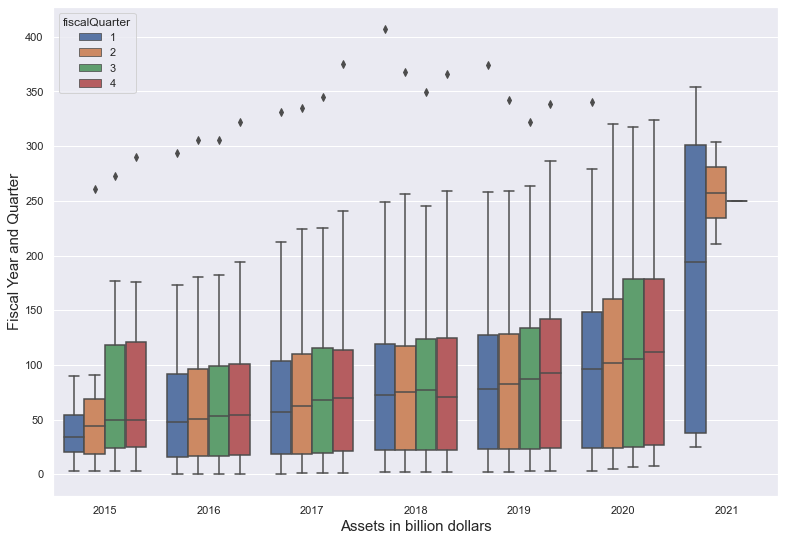

In [5]:
plt.figure(figsize=(13,9))

sns.set_theme()

balance["totalAssets in billion dollars"] = balance["totalAssets"] / 1000000000

sns.boxplot(data=balance, x="fiscalYear",  y="totalAssets in billion dollars", hue="fiscalQuarter")

plt.xlabel("Assets in billion dollars", fontsize=15)
plt.ylabel("Fiscal Year and Quarter", fontsize=15)


balance.drop(["totalAssets in billion dollars"], axis=1, inplace=True)

Text(0.5, 0, 'Year/Quarter')

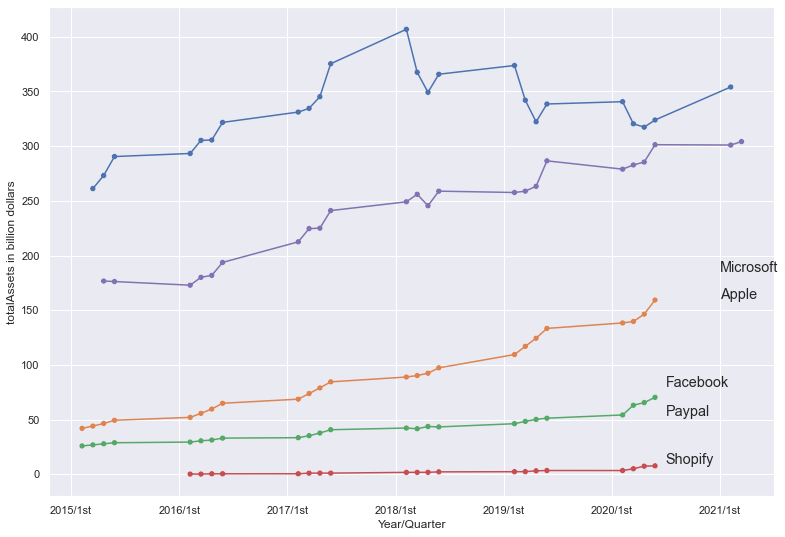

In [6]:
plt.figure(figsize=(13,9))

sns.set_theme()

few_keys = balance_income[balance_income["key"].isin(["AAPL", "FB", "PYPL", "SHOP", "MSFT"])]

# col = ['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3']

few_keys["totalAssets in billion dollars"] = few_keys["totalAssets"] / 1000000000

few_keys["year_quarter"] = (few_keys["fiscalYear"].astype(str) + few_keys["fiscalQuarter"].astype(str)).astype(int)


sns.lineplot(x="year_quarter", y="totalAssets in billion dollars", hue="key", data=few_keys, legend=False)
sns.scatterplot(x="year_quarter", y="totalAssets in billion dollars", hue="key", data=few_keys, legend=False)

plt.text(x=20210, y=185, s="Microsoft", fontsize="large")
plt.text(x=20210, y=160, s="Apple", fontsize="large")
plt.text(x=20205, y=80, s="Facebook", fontsize="large")
plt.text(x=20205, y=53, s="Paypal", fontsize="large")
plt.text(x=20205, y=10, s="Shopify", fontsize="large")

plt.xticks([20150, 20160, 20170, 20180, 20190, 20200, 20210] , ["2015/1st", "2016/1st", "2017/1st", "2018/1st", "2019/1st", "2020/1st", "2021/1st"])
plt.xlabel("Year/Quarter")

# balance_income["totalAssets in billion dollars"] = balance_income["totalAssets"] / 1000000000

# balance_income["year_quarter"] = (balance_income["fiscalYear"].astype(str) + balance_income["fiscalQuarter"].astype(str)).astype(int)


# sns.lineplot(x="year_quarter", y="totalAssets in billion dollars", hue="key", data=balance_income)
# sns.scatterplot(x="year_quarter", y="totalAssets in billion dollars", hue="key", data=balance_income)


In [7]:
print(sns.color_palette().as_hex())

['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']


In [8]:
keys = balance["key"].unique().tolist()

# Year-on-year growth rate and Quarter-on-quarter growth rate

In [9]:

for key in tqdm(keys):
    balance_income.loc[balance_income[balance_income["key"] == key].index, "q_change_OperatingIncome"] = balance_income[balance_income["key"] == key][ "operatingIncome"].pct_change(-1)
    balance_income.loc[balance_income[balance_income["key"] == key].index, "shifted_operatingIncome"] = balance_income[balance_income["key"] == key][ "operatingIncome"].shift(-1)

    balance_income.loc[balance_income[balance_income["key"] == key].index, "q_change_NetIncome"] = balance_income[balance_income["key"] == key][ "netIncome"].pct_change(-1)
    balance_income.loc[balance_income[balance_income["key"] == key].index, "shifted_netIncome"] = balance_income[balance_income["key"] == key]["netIncome"].shift(-1)

    for quarter in balance_income[balance_income["key"] == key]["fiscalQuarter"].unique():
        balance_income.loc[balance_income[(balance_income["key"] == key) & (balance_income["fiscalQuarter"] == quarter)].index, "year_q_change_OperatingIncome"] = balance_income[(balance_income["key"] == key) & (balance_income["fiscalQuarter"] == quarter)]["operatingIncome"].pct_change(1)
        balance_income.loc[balance_income[(balance_income["key"] == key) & (balance_income["fiscalQuarter"] == quarter)].index, "year_q_change_NetIncome"] = balance_income[(balance_income["key"] == key) & (balance_income["fiscalQuarter"] == quarter)]["netIncome"].pct_change(1)

        balance_income.loc[balance_income[(balance_income["key"] == key) & (balance_income["fiscalQuarter"] == quarter)].index, "shifted_year_OperatingIncome"] = balance_income[(balance_income["key"] == key) & (balance_income["fiscalQuarter"] == quarter)]["operatingIncome"].shift(1)
        balance_income.loc[balance_income[(balance_income["key"] == key) & (balance_income["fiscalQuarter"] == quarter)].index, "shifted_year_NetIncome"] = balance_income[(balance_income["key"] == key) & (balance_income["fiscalQuarter"] == quarter)]["netIncome"].shift(1)

balance_income.loc[balance_income[(balance_income["shifted_operatingIncome"] < 0) & (balance_income["operatingIncome"] > 0)].index, "q_change_OperatingIncome"] = -balance_income[(balance_income["shifted_operatingIncome"] < 0) & (balance_income["operatingIncome"] > 0)]["q_change_OperatingIncome"]
balance_income.loc[balance_income[(balance_income["shifted_netIncome"] < 0) & (balance_income["netIncome"] > 0)].index, "q_change_NetIncome"] = -balance_income[(balance_income["shifted_netIncome"] < 0) & (balance_income["netIncome"] > 0)]["q_change_NetIncome"]

balance_income.loc[balance_income[(balance_income["shifted_year_OperatingIncome"] < 0) & (balance_income["operatingIncome"] > 0)].index, "year_q_change_OperatingIncome"] = -balance_income[(balance_income["shifted_year_OperatingIncome"] < 0) & (balance_income["operatingIncome"] > 0)]["year_q_change_OperatingIncome"]
balance_income.loc[balance_income[(balance_income["shifted_year_NetIncome"] < 0) & (balance_income["netIncome"] > 0)].index, "year_q_change_NetIncome"] = -balance_income[(balance_income["shifted_year_NetIncome"] < 0) & (balance_income["netIncome"] > 0)]["year_q_change_NetIncome"]


fill_cols = ["year_q_change_OperatingIncome",  "q_change_OperatingIncome", "q_change_NetIncome", "year_q_change_NetIncome"]
balance_income[fill_cols] = balance_income[fill_cols].fillna(0)


balance_income.drop(["shifted_netIncome", "shifted_operatingIncome", "shifted_year_OperatingIncome", "shifted_year_NetIncome"], axis=1, inplace=True)




  0%|          | 0/10 [00:00<?, ?it/s]

In [10]:
# balance_income["year_q_change_OperatingIncome"]

In [11]:
# balance_income[balance_income["key"] == "AAPL"][["fiscalYear", "fiscalQuarter", "operatingIncome", "year_q_change_OperatingIncome"]]

## Quarter-on-Quarter growth of Apple

Text(0, 0.5, 'Quarter-on-Quarter growth')

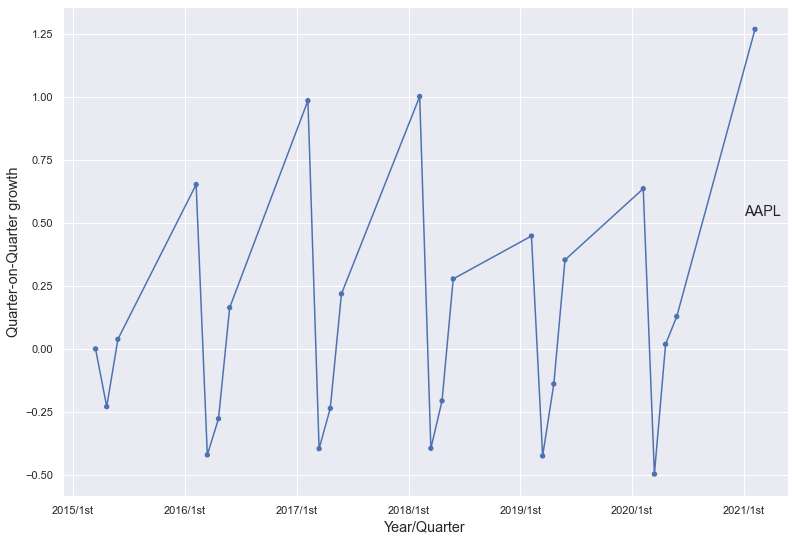

In [12]:
plt.figure(figsize=(13,9))

sns.set_theme()

few_keys = balance_income[balance_income["key"].isin(["AAPL"])]

few_keys["year_quarter"] = (few_keys["fiscalYear"].astype(str) + few_keys["fiscalQuarter"].astype(str)).astype(int)


sns.lineplot(x="year_quarter", y="q_change_OperatingIncome", hue="key", data=few_keys, legend=False)
sns.scatterplot(x="year_quarter", y="q_change_OperatingIncome", hue="key", data=few_keys, legend=False)

plt.text(x=20210, y=0.53, s="AAPL", fontsize="large")

plt.xticks([20150, 20160, 20170, 20180, 20190, 20200, 20210] , ["2015/1st", "2016/1st", "2017/1st", "2018/1st", "2019/1st", "2020/1st", "2021/1st"])
plt.xlabel("Year/Quarter", fontsize="large")
plt.ylabel("Quarter-on-Quarter growth", fontsize="large")

## Year-on-Year growth of Apple

Text(0, 0.5, 'Year-on-Year growth')

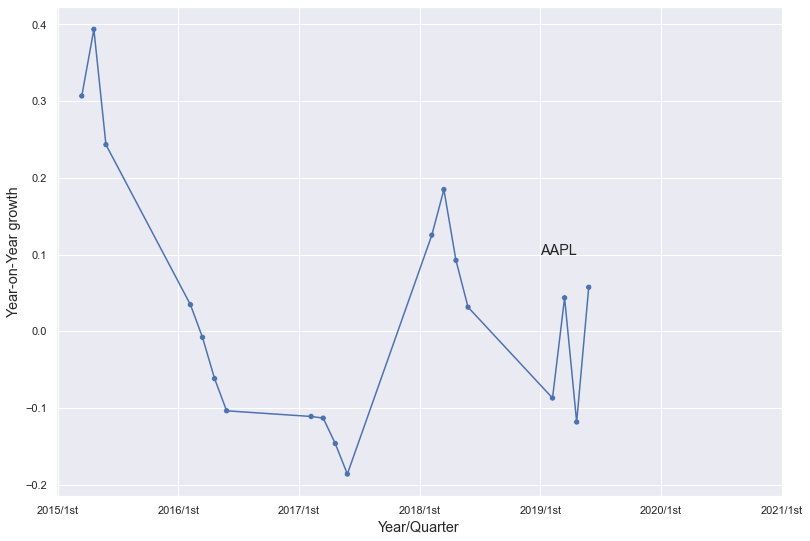

In [13]:
plt.figure(figsize=(13,9))

sns.set_theme()

few_keys = few_keys[few_keys["year_quarter"] < 20201]

sns.lineplot(x="year_quarter", y="year_q_change_OperatingIncome", hue="key", data=few_keys, legend=False)
sns.scatterplot(x="year_quarter", y="year_q_change_OperatingIncome", hue="key", data=few_keys, legend=False)

plt.text(x=20190, y=0.1, s="AAPL", fontsize="large")

plt.xticks([20150, 20160, 20170, 20180, 20190, 20200, 20210] , ["2015/1st", "2016/1st", "2017/1st", "2018/1st", "2019/1st", "2020/1st", "2021/1st"])
plt.xlabel("Year/Quarter", fontsize="large")
plt.ylabel("Year-on-Year growth", fontsize="large")


## Mean quarter-on-quarter growth

In [14]:
mean_df = balance_income.copy()

mean_df = balance_income.groupby(["fiscalYear", "fiscalQuarter"])[["netIncome", "operatingIncome", "totalAssets", "longTermDebt", "q_change_OperatingIncome", "year_q_change_OperatingIncome"]].mean()

# mean_df = mean_df.to_frame()
mean_df.reset_index(inplace=True)

mean_df["year_quarter"] = (mean_df["fiscalYear"].astype(str) + mean_df["fiscalQuarter"].astype(str)).astype(int)

mean_df["totalAssets"] = mean_df["totalAssets"] / 1000000000
mean_df["longTermDebt"] = mean_df["longTermDebt"] / 1000000000


mean_df.head(2)

,fiscalYear,fiscalQuarter,netIncome,operatingIncome,totalAssets,longTermDebt,q_change_OperatingIncome,year_q_change_OperatingIncome,year_quarter
0,2015,1,6.422500e+08,9.912500e+08,40.236250,3.791500,0.000000,-0.236485,20151
1,2015,2,2.616356e+09,3.642379e+09,69.206626,8.163054,0.337501,0.353702,20152


Text(0.5, 0, 'Year/Quarter')

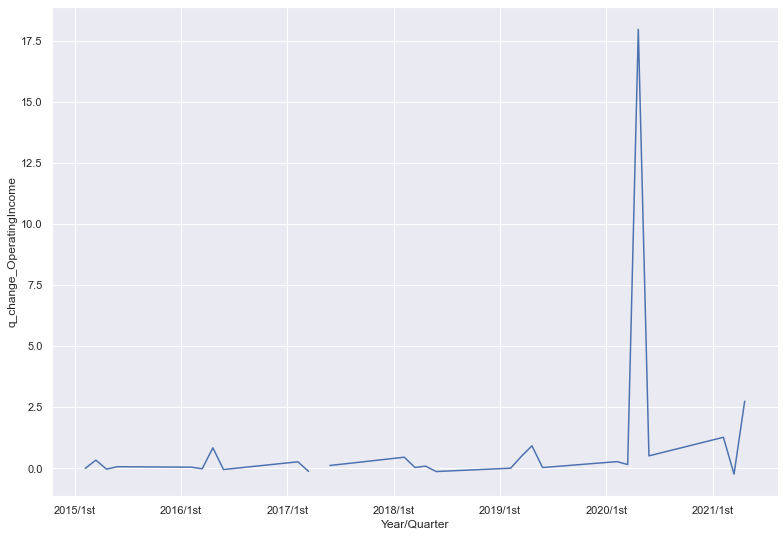

In [15]:
plt.figure(figsize=(13,9))

sns.set_theme()

# sns.lineplot(x="year_quarter", y="netIncome", data=mean_df)
sns.lineplot(x="year_quarter", y="q_change_OperatingIncome", data=mean_df)

# plt.text(x=20190, y=130, s="TotalAssets", fontsize="large")
# plt.text(x=20190, y=35, s="Longterm Debt", fontsize="large")

plt.xticks([20150, 20160, 20170, 20180, 20190, 20200, 20210] , ["2015/1st", "2016/1st", "2017/1st", "2018/1st", "2019/1st", "2020/1st", "2021/1st"])
plt.xlabel("Year/Quarter")

## Each quarter-on-quarter growth

Text(0, 0.5, 'Quarter-on-Quarter growth')

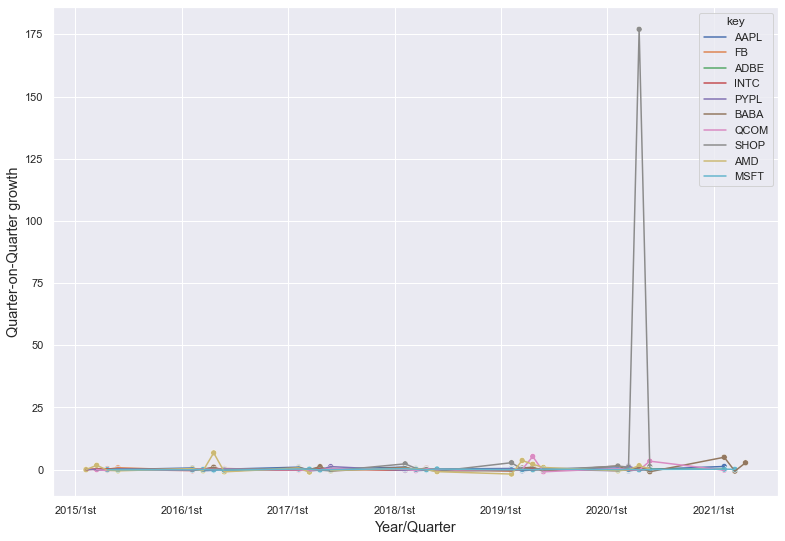

In [16]:
plt.figure(figsize=(13,9))

sns.set_theme()

few_keys = balance_income.copy()

few_keys["year_quarter"] = (few_keys["fiscalYear"].astype(str) + few_keys["fiscalQuarter"].astype(str)).astype(int)


sns.lineplot(x="year_quarter", y="q_change_OperatingIncome", hue="key", data=few_keys)
sns.scatterplot(x="year_quarter", y="q_change_OperatingIncome", hue="key", data=few_keys, legend=False)

# plt.text(x=20210, y=0.53, s="AAPL", fontsize="large")

plt.xticks([20150, 20160, 20170, 20180, 20190, 20200, 20210] , ["2015/1st", "2016/1st", "2017/1st", "2018/1st", "2019/1st", "2020/1st", "2021/1st"])
plt.xlabel("Year/Quarter", fontsize="large")
plt.ylabel("Quarter-on-Quarter growth", fontsize="large")

## Check SHOP

In [17]:
balance_income[balance_income["key"] == "SHOP"].head(10)

,accountsPayable,capitalSurplus,commonStock,currency_x,currentAssets,currentCash,currentLongTermDebt,filingType_x,fiscalDate_x,fiscalQuarter,fiscalYear,goodwill,intangibleAssets,inventory,longTermDebt,longTermInvestments,minorityInterest_x,netTangibleAssets,otherAssets,otherCurrentAssets,otherCurrentLiabilities,otherLiabilities,propertyPlantEquipment,receivables,reportDate_x,retainedEarnings,shareholderEquity,shortTermInvestments,symbol_x,totalAssets,totalCurrentLiabilities,totalLiabilities,treasuryStock,id_x,key,subkey_x,date_x,updated_x,costOfRevenue,currency_y,ebit,filingType_y,fiscalDate_y,grossProfit,incomeTax,interestIncome,minorityInterest_y,netIncome,netIncomeBasic,operatingExpense,operatingIncome,otherIncomeExpenseNet,pretaxIncome,reportDate_y,researchAndDevelopment,sellingGeneralAndAdmin,symbol_y,totalRevenue,id_y,subkey_y,date_y,updated_y,q_change_OperatingIncome,q_change_NetIncome,year_q_change_OperatingIncome,year_q_change_NetIncome
167,0,NaN,122220142,USD,6.877756e+09,6.387967e+09,0.0,40-F,2020-12-31,4,2020,311865000.0,135676000.0,0.0,758008000.0,885149000.0,0.0,5.953182e+09,0.0,68247000.0,438332000.0,21006000.0,92104000.0,421542000.0,2021-02-17,15285000.0,6.400723e+09,68247000.0,SHOP,7.762905e+09,438332000.0,1.362182e+09,0.0,BALANCE_SHEET,SHOP,quarterly,1609372800000,1613794435000,473356000.0,USD,112541000.0,40-F,2020-12-31,504388000.0,-14119000.0,4620000.0,0.0,123872000.0,123872000.0,865203000.0,112541000.0,0,109753000.0,2021-02-17,159077000.0,220123000.0,SHOP,977744000.0,INCOME,quarterly,1609372800000,1613794435000,1.225846,-0.351686,0.000000,0.000000
168,0,NaN,120511484,USD,6.788833e+09,6.121161e+09,0.0,6-K,2020-09-30,3,2020,311865000.0,143925000.0,0.0,750452000.0,673198000.0,0.0,5.721039e+09,0.0,63076000.0,370131000.0,23080000.0,94698000.0,428980000.0,2020-10-29,-108587000.0,6.176829e+09,233576000.0,SHOP,7.462031e+09,370131000.0,1.285202e+09,0.0,BALANCE_SHEET,SHOP,quarterly,1601424000000,1613076889000,362257000.0,USD,50561000.0,6-K,2020-09-30,405148000.0,-4701000.0,-2550000.0,0.0,191068000.0,191068000.0,716844000.0,50561000.0,0,186367000.0,2020-10-29,143427000.0,199407000.0,SHOP,767405000.0,INCOME,quarterly,1601424000000,1613076889000,177.031690,4.307739,0.000000,0.000000
169,0,NaN,118740645,USD,4.389194e+09,4.000955e+09,0.0,6-K,2020-06-30,2,2020,311865000.0,151254000.0,0.0,0.0,709245000.0,0.0,4.165820e+09,0.0,66162000.0,320506000.0,6866000.0,95506000.0,322077000.0,2020-07-29,-299655000.0,4.628939e+09,66162000.0,SHOP,5.098439e+09,320506000.0,4.695000e+08,0.0,BALANCE_SHEET,SHOP,quarterly,1593475200000,1613076889000,339307000.0,USD,284000.0,6-K,2020-06-30,375034000.0,-31630000.0,-5952000.0,0.0,35998000.0,35998000.0,714057000.0,284000.0,0,4368000.0,2020-07-29,133227000.0,228157000.0,SHOP,714341000.0,INCOME,quarterly,1593475200000,1608330865000,1.003878,2.145375,0.000000,0.000000
170,0,NaN,116806549,USD,2.727888e+09,2.360572e+09,0.0,6-K,2020-03-31,1,2020,311865000.0,159004000.0,0.0,0.0,743028000.0,0.0,2.569982e+09,0.0,58912000.0,288557000.0,5580000.0,116832000.0,308404000.0,2020-05-06,-335653000.0,3.040851e+09,58912000.0,SHOP,3.470916e+09,288557000.0,4.300650e+08,0.0,BALANCE_SHEET,SHOP,quarterly,1585612800000,1613076889000,213051000.0,USD,-73233000.0,6-K,2020-03-31,256950000.0,-28695000.0,-10467000.0,0.0,-31429000.0,-31429000.0,543234000.0,-73233000.0,0,-60124000.0,2020-05-06,116396000.0,199704000.0,SHOP,470001000.0,INCOME,quarterly,1585612800000,1608330865000,1.434689,-41.763943,0.000000,0.000000
171,0,NaN,116084014,USD,2.744728e+09,2.455194e+09,0.0,40-F,2019-12-31,4,2019,311865000.0,167282000.0,0.0,0.0,744751000.0,0.0,2.536587e+09,0.0,48833000.0,316382000.0,5969000.0,111398000.0,240701000.0,2020-02-12,-304224000.0,3.015734e+09,48833000.0,SHOP,3.489479e+09,316382000.0,4.737450e+08,0.0,BALANCE_SHEET,SHOP,quarterly,1577750400000,1613076889000,241269000.0,USD,-30079000.0,40-F,2019-12-31,263891000.0,-19311000.0,-23930000.0,0.0,771000.0,771000.0,535239000.0,-30079000.0,0,-18540000.0,2020-02-12,102753000.0,191217000.

## Plot mean quarter-on-quarter growth without SHOP

Text(0.5, 0, 'Year/Quarter')

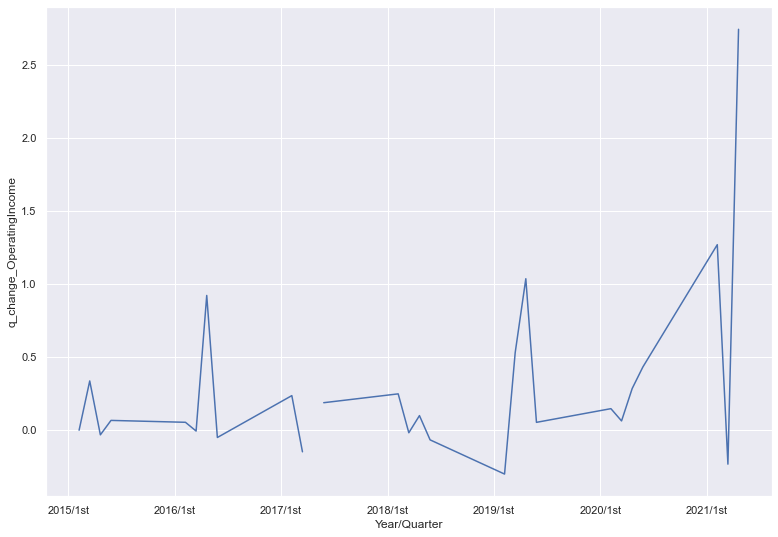

In [25]:
mean_df = balance_income[balance_income["key"] != "SHOP"].copy()

# mean_df.head()
mean_df = mean_df.groupby(["fiscalYear", "fiscalQuarter"])[["netIncome", "operatingIncome", "totalAssets", "longTermDebt", "q_change_OperatingIncome", "year_q_change_OperatingIncome"]].mean()

# mean_df = mean_df.to_frame()
mean_df.reset_index(inplace=True)

mean_df["year_quarter"] = (mean_df["fiscalYear"].astype(str) + mean_df["fiscalQuarter"].astype(str)).astype(int)

mean_df["totalAssets"] = mean_df["totalAssets"] / 1000000000
mean_df["longTermDebt"] = mean_df["longTermDebt"] / 1000000000


plt.figure(figsize=(13,9))

sns.set_theme()

# sns.lineplot(x="year_quarter", y="netIncome", data=mean_df)
sns.lineplot(x="year_quarter", y="q_change_OperatingIncome", data=mean_df)

# plt.text(x=20190, y=130, s="TotalAssets", fontsize="large")
# plt.text(x=20190, y=35, s="Longterm Debt", fontsize="large")

plt.xticks([20150, 20160, 20170, 20180, 20190, 20200, 20210] , ["2015/1st", "2016/1st", "2017/1st", "2018/1st", "2019/1st", "2020/1st", "2021/1st"])
plt.xlabel("Year/Quarter")

## Mean total assets and debt growth

In [ ]:
plt.figure(figsize=(13,9))

sns.set_theme()

# sns.lineplot(x="year_quarter", y="netIncome", data=mean_df)
sns.lineplot(x="year_quarter", y="totalAssets", data=mean_df)
sns.lineplot(x="year_quarter", y="longTermDebt", data=mean_df)


plt.text(x=20190, y=130, s="TotalAssets", fontsize="large")
plt.text(x=20190, y=35, s="Longterm Debt", fontsize="large")

plt.xticks([20150, 20160, 20170, 20180, 20190, 20200, 20210] , ["2015/1st", "2016/1st", "2017/1st", "2018/1st", "2019/1st", "2020/1st", "2021/1st"])
plt.xlabel("Year/Quarter")